<a href="https://colab.research.google.com/github/vgs1004/MyProjects/blob/main/gold-price/gold_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gold Price Forecasting using Machine Learning and Deep Learning Techniques**



*   Predict future gold prices based on historical trends
*   Visualize insights and deploy a mini dashboard



In [2]:
import pandas as pd

# 📥 Load dataset from GitHub raw URL
url = "https://raw.githubusercontent.com/vgs1004/MyProjects/446fe491531474ef6164833bc690a7166d7f5599/gold-price/gold_price.csv"
df = pd.read_csv(url, parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df.sort_index()

# 🔍 Quick check
print(df.head())
print(df.columns)



              USD    EUR       JPY    GBP    CAD    CHF      INR  CNY  TRY  \
Date                                                                         
1978-12-29  226.0  137.1       NaN  110.7    NaN    NaN      NaN  NaN  NaN   
1979-01-01  226.0  137.1       NaN  110.7    NaN    NaN      NaN  NaN  NaN   
1979-01-02  226.8  137.3  43,164.9  111.5  263.7  359.6  1,792.9  NaN  NaN   
1979-01-03  218.6  134.0  43,717.9  108.0  264.4  365.9  1,802.2  NaN  NaN   
1979-01-04  223.2  136.8  43,674.9  110.7  264.1  366.4  1,811.7  NaN  NaN   

              SAR        IDR    AED      THB  VND  EGP        KRW  RUB    ZAR  \
Date                                                                            
1978-12-29    NaN        NaN    NaN      NaN  NaN  NaN        NaN  NaN    NaN   
1979-01-01    NaN        NaN    NaN      NaN  NaN  NaN        NaN  NaN    NaN   
1979-01-02  735.6  138,160.5  851.3  4,454.6  NaN  NaN  107,470.0  NaN  194.6   
1979-01-03  739.4  138,877.0  855.7  4,477.7  Na

<ipython-input-3-ff9d68682e69>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, str) else x)


USD    float64
EUR    float64
JPY    float64
GBP    float64
CAD    float64
CHF    float64
INR    float64
CNY    float64
TRY    float64
SAR    float64
IDR    float64
AED    float64
THB    float64
VND    float64
EGP    float64
KRW    float64
RUB    float64
ZAR    float64
AUD    float64
dtype: object
              USD    EUR      JPY    GBP    CAD    CHF     INR  CNY  TRY  \
Date                                                                       
1978-12-29  226.0  137.1      NaN  110.7    NaN    NaN     NaN  NaN  NaN   
1979-01-01  226.0  137.1      NaN  110.7    NaN    NaN     NaN  NaN  NaN   
1979-01-02  226.8  137.3  43164.9  111.5  263.7  359.6  1792.9  NaN  NaN   
1979-01-03  218.6  134.0  43717.9  108.0  264.4  365.9  1802.2  NaN  NaN   
1979-01-04  223.2  136.8  43674.9  110.7  264.1  366.4  1811.7  NaN  NaN   

              SAR       IDR    AED     THB  VND  EGP       KRW  RUB    ZAR  \
Date                                                                         
1978-12-29  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


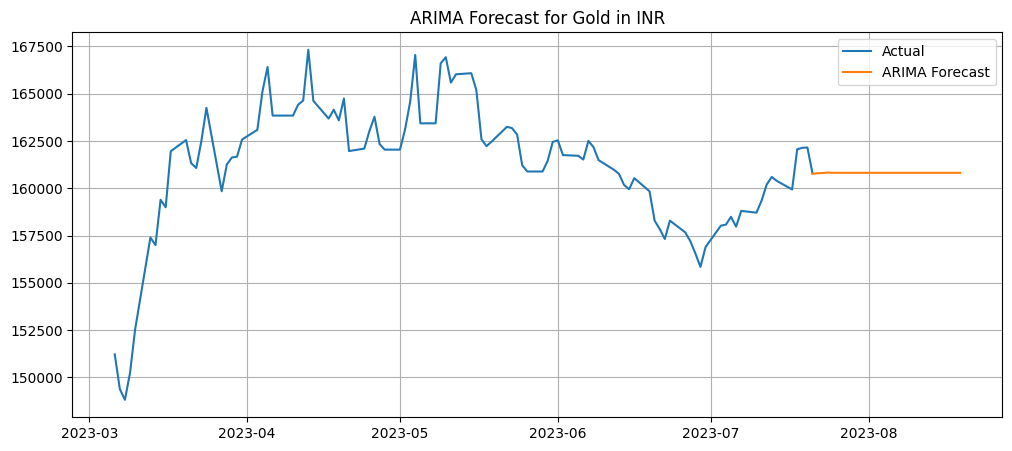

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


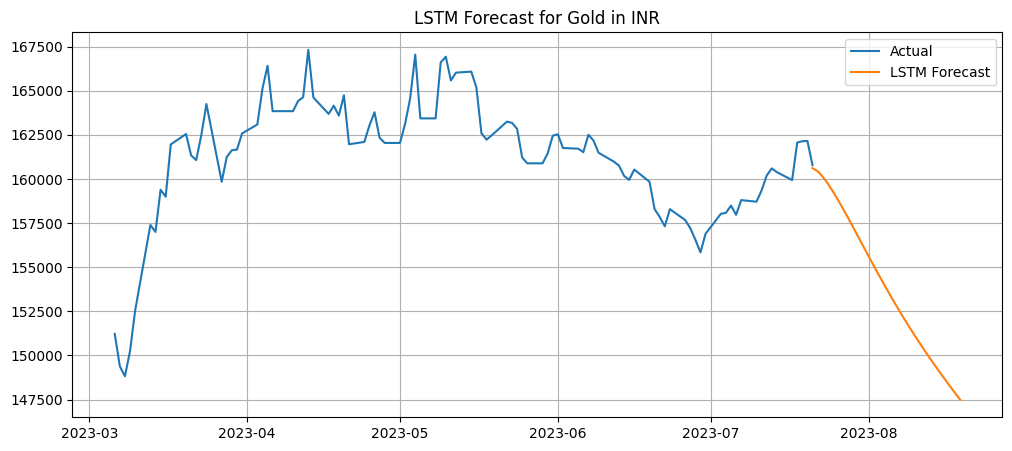

In [3]:
#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load & Clean Data
df = pd.read_csv("https://raw.githubusercontent.com/vgs1004/MyProjects/446fe491531474ef6164833bc690a7166d7f5599/gold-price/gold_price.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df.sort_index()

# Clean numeric commas
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, str) else x)
df = df.apply(pd.to_numeric, errors='coerce')


# Show cleaned data
print(df.dtypes)
print(df.head())

# Choose currency
currency = "INR"

# Prepare series
if currency in df.columns and df[currency].dropna().shape[0] > 100:
    series = df[currency].dropna()

    #  ADF Test
    result = adfuller(series)
    print(f"\nADF Statistic for {currency}: {result[0]}")
    print(f"p-value: {result[1]}")

    # ARIMA Forecast
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit()
    forecast_arima = model_fit.forecast(steps=30)
    forecast_dates = pd.date_range(series.index[-1], periods=30, freq='D')

    # Plot ARIMA
    plt.figure(figsize=(12, 5))
    plt.plot(series[-100:], label='Actual')
    plt.plot(forecast_dates, forecast_arima, label='ARIMA Forecast')
    plt.title(f"ARIMA Forecast for Gold in {currency}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # LSTM Forecasting
    series_values = series.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series_values)

    def create_sequences(data, window=60):
        X, y = [], []
        for i in range(window, len(data)):
            X.append(data[i-window:i])
            y.append(data[i])
        return np.array(X), np.array(y)

    X, y = create_sequences(scaled)

    # Build LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    # Forecast next 30 days
    last_60 = scaled[-60:]
    predictions = []
    current_input = last_60.reshape(1, 60, 1)

    for _ in range(30):
        pred = model.predict(current_input, verbose=0)[0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[pred]], axis=1)

    forecast_lstm = scaler.inverse_transform(predictions).flatten()

    # Plot LSTM
    plt.figure(figsize=(12, 5))
    plt.plot(series[-100:], label='Actual')
    plt.plot(forecast_dates, forecast_lstm, label='LSTM Forecast')
    plt.title(f"LSTM Forecast for Gold in {currency}")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print(f"⚠️ Not enough data for {currency} or column missing!")
